In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.patches as mpatches
import pandas as pd
import random

In [30]:
fname1 = 'data/normal1-no-memory-lock.txt'
fname2 = 'data/rt1-no-memory-lock.txt'
fnames = [
    'measurements-1-1.txt',
    'measurements-2-1.txt',
    'measurements-3.txt',
    'measurements-4.txt',
    'no-rt-rr-sched-10000.txt',
    'only-prio-10000.txt',
    'only-prio-100000.txt',
    'only-prio-channel-100000.txt',
]
data_names = {
    'normal': fnames[0],
    'nologging': fnames[1],
    'memory lock': fnames[2],
    'RR sched all 98': fnames[3],
    'RR sched 98-20': fnames[4],
    'PREEMPT_RT': fnames[5],
    'Trigger as packet 100000': fnames[6],
    'Trigger as channel 100000': fnames[7],
}
data_names

{'normal': 'measurements-1-1.txt',
 'nologging': 'measurements-2-1.txt',
 'memory lock': 'measurements-3.txt',
 'RR sched all 98': 'measurements-4.txt',
 'RR sched 98-20': 'no-rt-rr-sched-10000.txt',
 'PREEMPT_RT': 'only-prio-10000.txt',
 'Trigger as packet 100000': 'only-prio-100000.txt',
 'Trigger as channel 100000': 'only-prio-channel-100000.txt'}

In [32]:
def read_file(file_name):
    with open(file_name, 'r') as f:
        data = f.readlines()

        data = np.asarray(data)
        data = [float(line) / 1000 for line in data]
    return data


def format_time():
    a = datetime.datetime.now()
    return f"{a.year}-{a.month}-{a.day}_{a.hour}-{a.minute}-{a.second}"

In [33]:
violet = "#332288"
darkgreen = "#117733"
turqoise = "#44AA99"
blue = "#88CCEE"
yellow = "#DDCC77"
red = "#CC6677"
pink = "#AA4499"
green = "#90FD1F"
colors = [
    violet,
    darkgreen,
    turqoise,
    blue,
    yellow,
    red,
    pink,
    green
]

In [34]:
bin_width = 0.2
bins = [x * bin_width for x in range(0, int(10 / bin_width))][1:]

In [35]:
datas = {}
for fname in fnames:
    data = read_file('data/' + fname)
    print(f"{fname} len {len(data)}")

    key = [k for k, v in data_names.items() if v == fname][0]
    max_len = 10001 if len(data) < 15000 else 100001
    datas[key] = data[1:max_len]
datas.keys()

measurements-1-1.txt len 11886
measurements-2-1.txt len 10585
measurements-3.txt len 10317
measurements-4.txt len 10339
no-rt-rr-sched-10000.txt len 10644
only-prio-10000.txt len 11876
only-prio-100000.txt len 111050
only-prio-channel-100000.txt len 104268


dict_keys(['normal', 'nologging', 'memory lock', 'RR sched all 98', 'RR sched 98-20', 'PREEMPT_RT', 'Trigger as packet 100000', 'Trigger as channel 100000'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


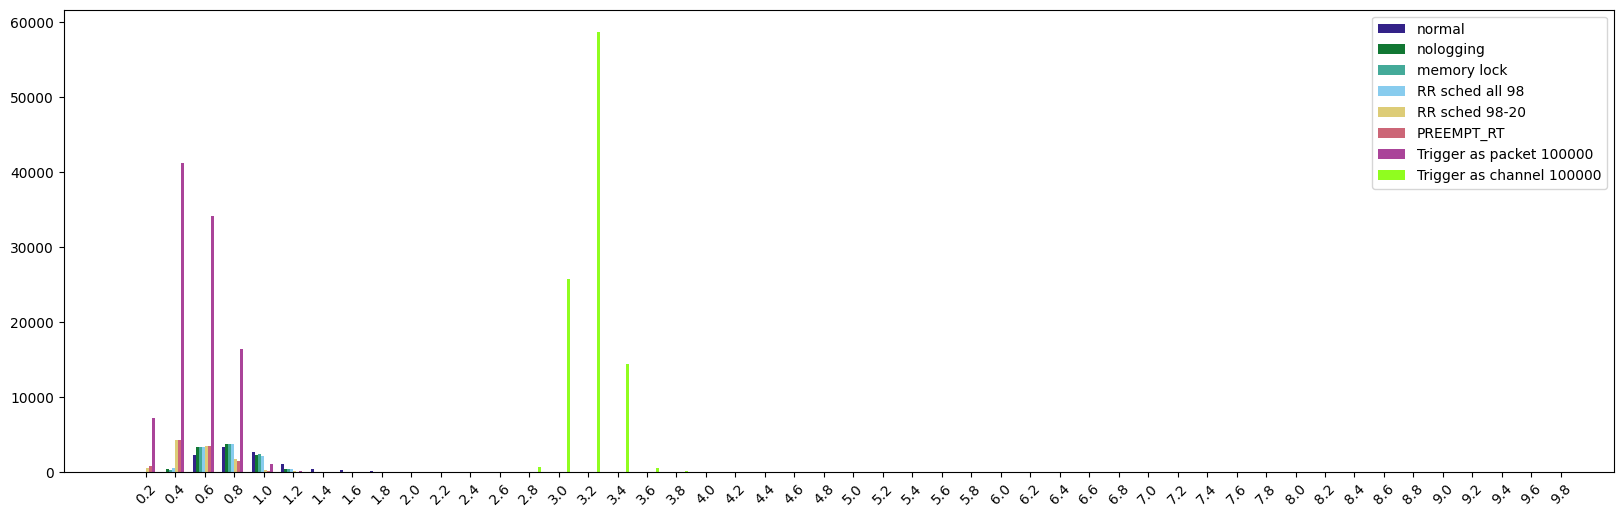

In [36]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

plt.hist(datas.values(), label=list(data_names.keys()), color=colors[:len(datas)], alpha=1, bins=bins, log=False,
         align='left')
plt.legend(loc='upper right')
plt.xticks(bins, rotation=45)

t = format_time()
plt.savefig(f"plots/hist-{t}.svg")
plt.savefig(f"plots/hist-{t}.eps")
plt.show()

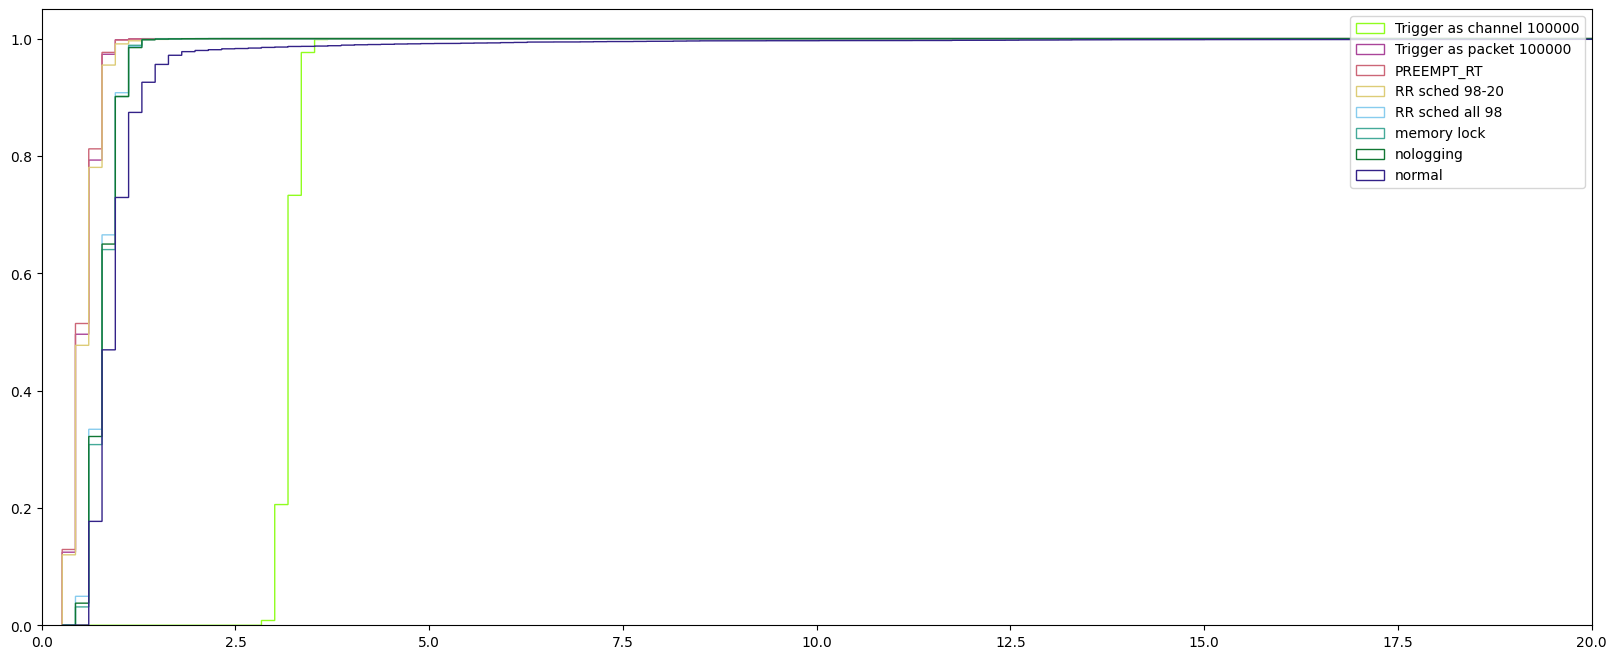

In [37]:
fig, ax = plt.subplots(figsize=(20, 8))

n, _, patches = ax.hist(datas.values(), int(20 / 0.01), density=True, cumulative=True, histtype='step',
                        label=list(data_names.keys()), color=colors[:len(datas)])

# plt.hist(data, label=name, color=color, alpha=1, bins=bins, log=True, align='left')
plt.legend(loc='upper right')
# plt.xticks(bins, rotation=45)

#t = format_time()
# plt.savefig(f"plots/hist-{t}.svg")
# plt.savefig(f"plots/hist-{t}.eps")
plt.xlim(0, 20)
plt.show()

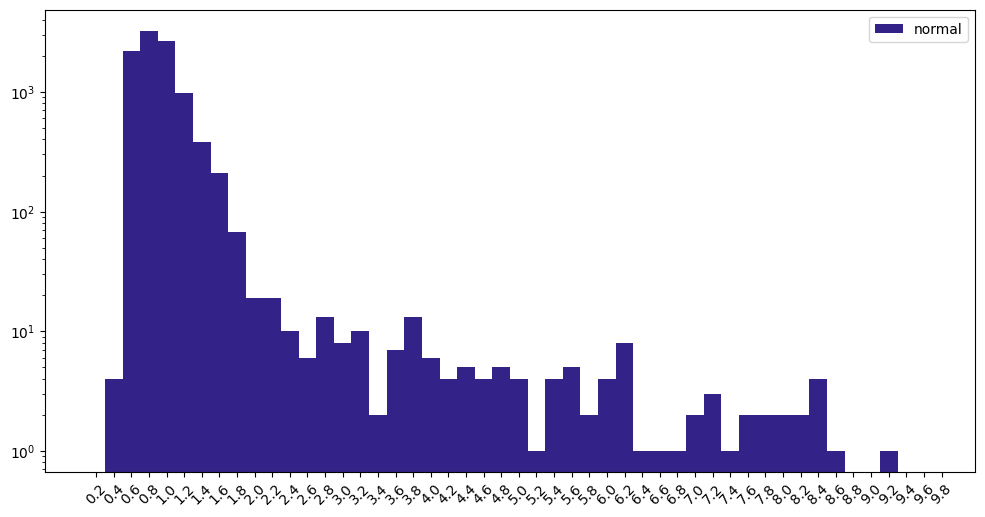

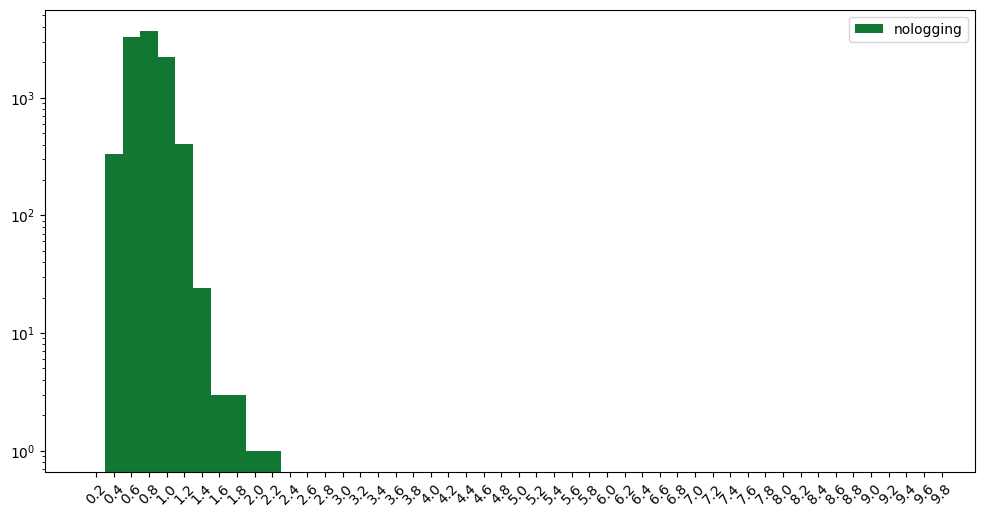

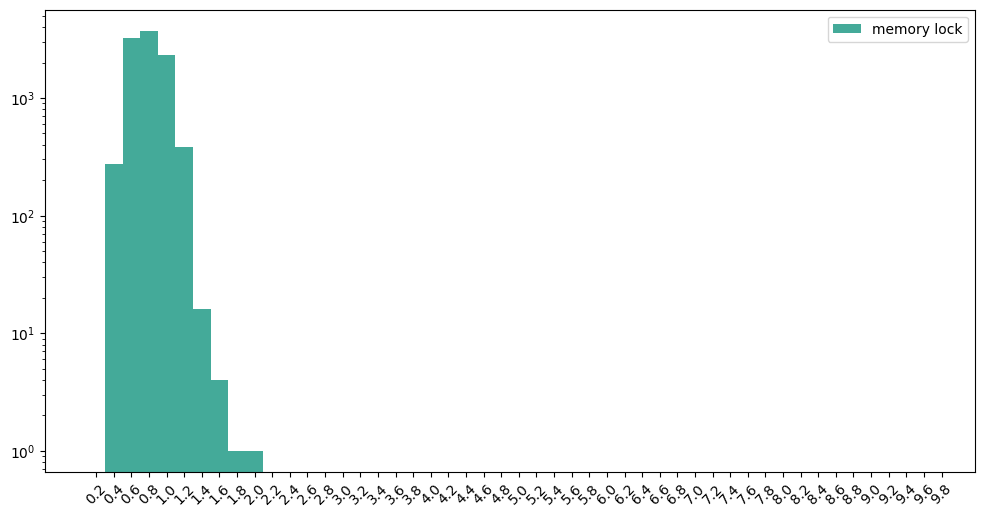

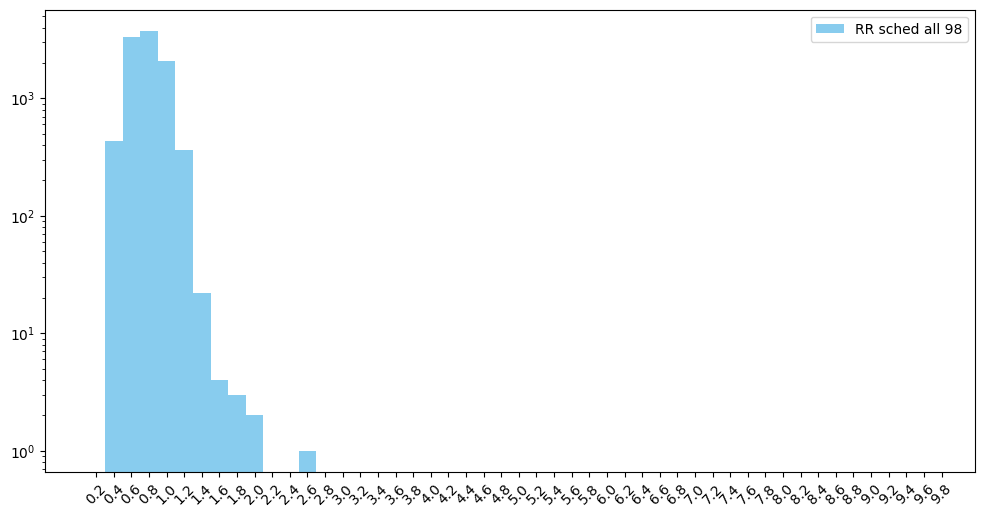

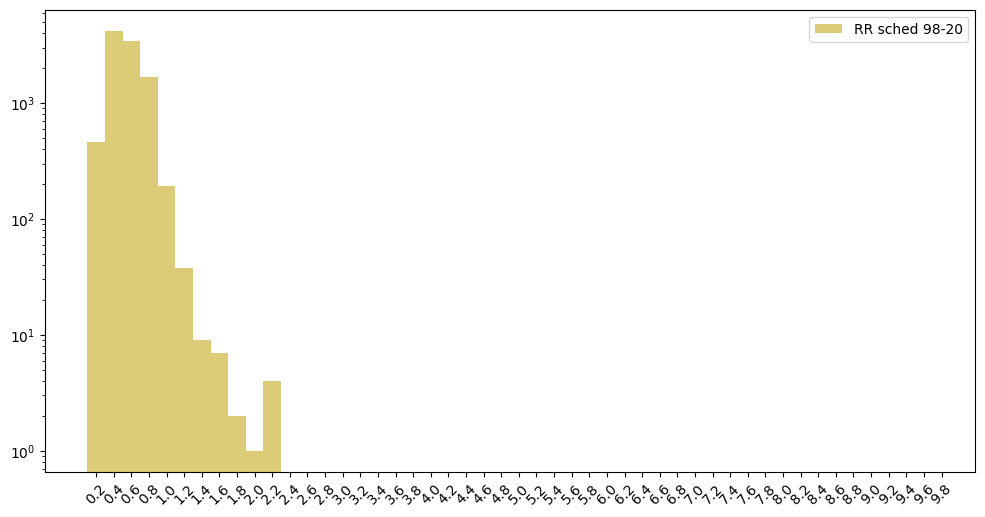

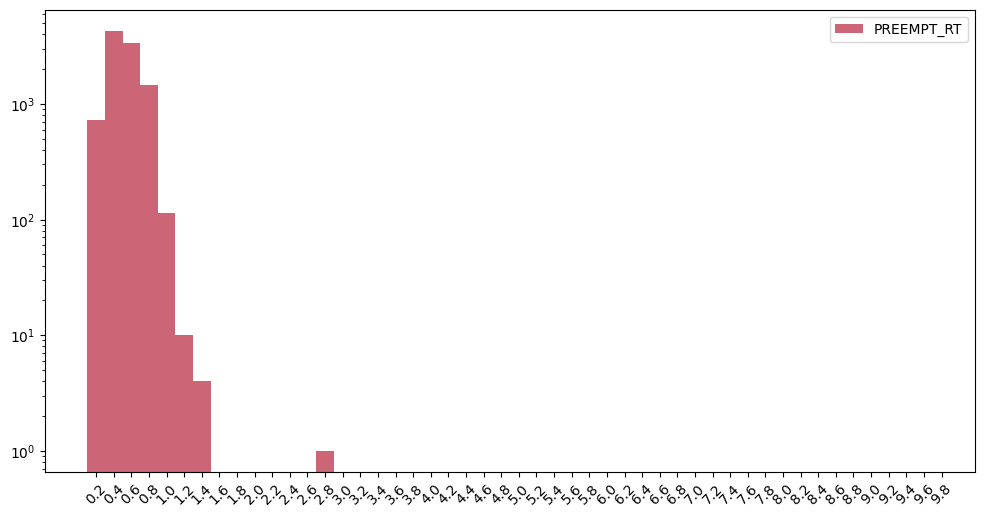

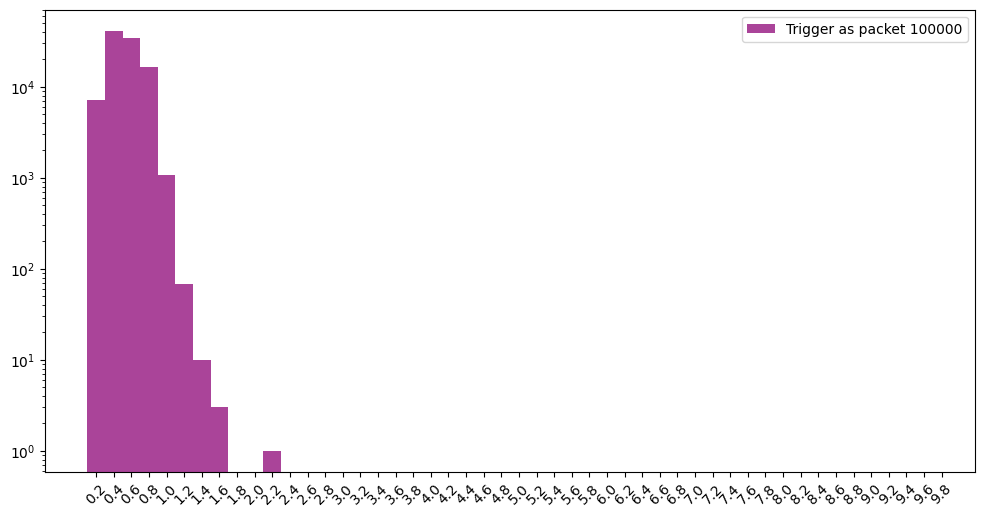

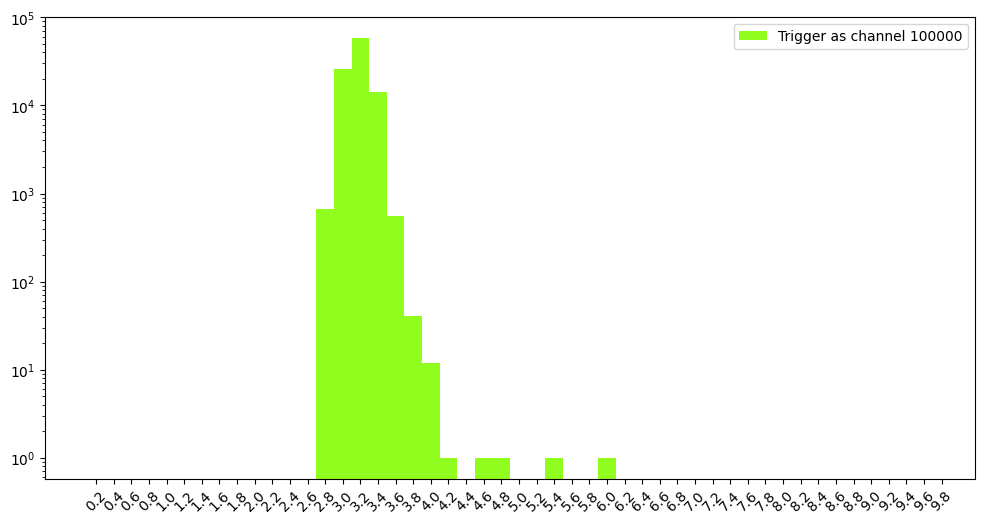

In [38]:
for i, key in enumerate(data_names):
    data = datas[key]
    name = data_names[key]
    color = colors[i]
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(6)

    plt.hist(data, label=key, color=color, alpha=1, bins=bins, log=True, align='left')
    plt.legend(loc='upper right')
    plt.xticks(bins, rotation=45)

    t = format_time()
    # plt.savefig(f"plots/hist-{t}.svg")
    # plt.savefig(f"plots/hist-{t}.eps")
    plt.show()


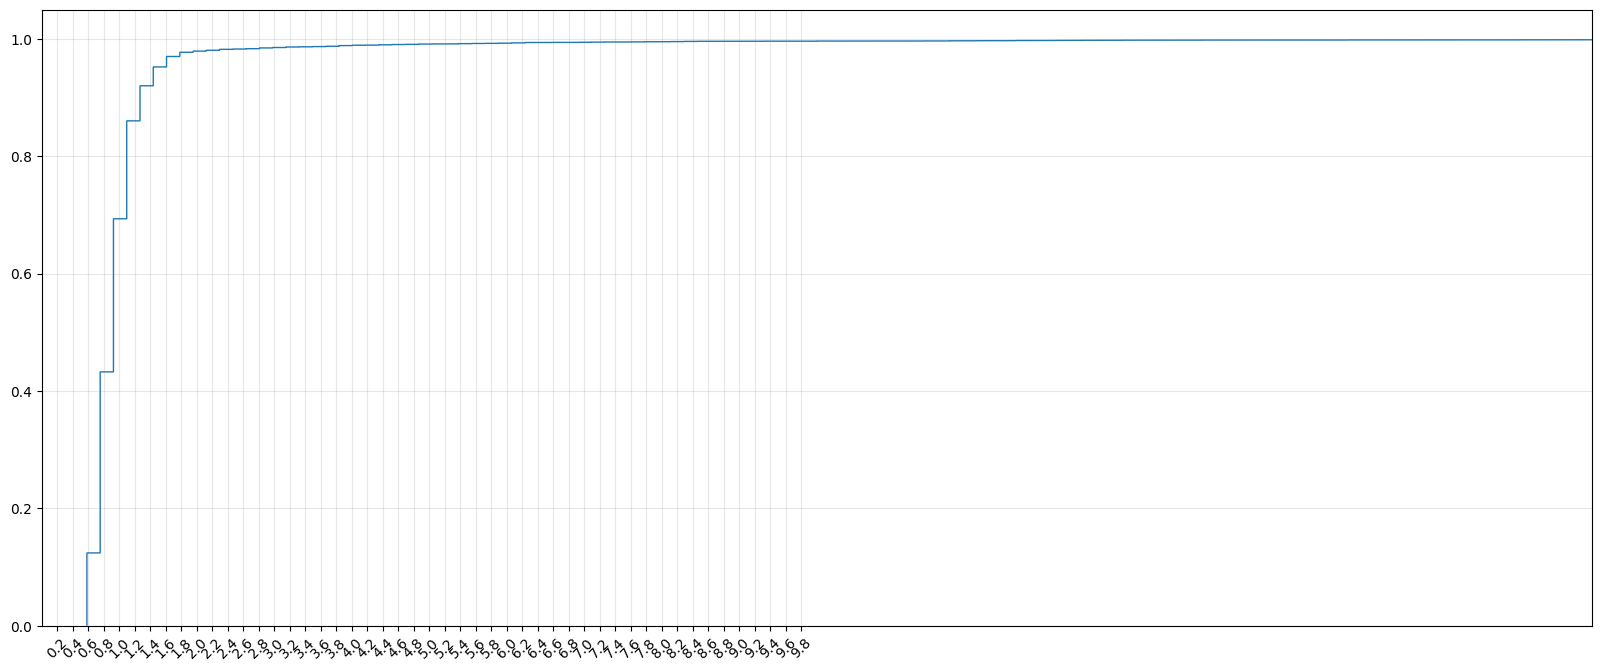

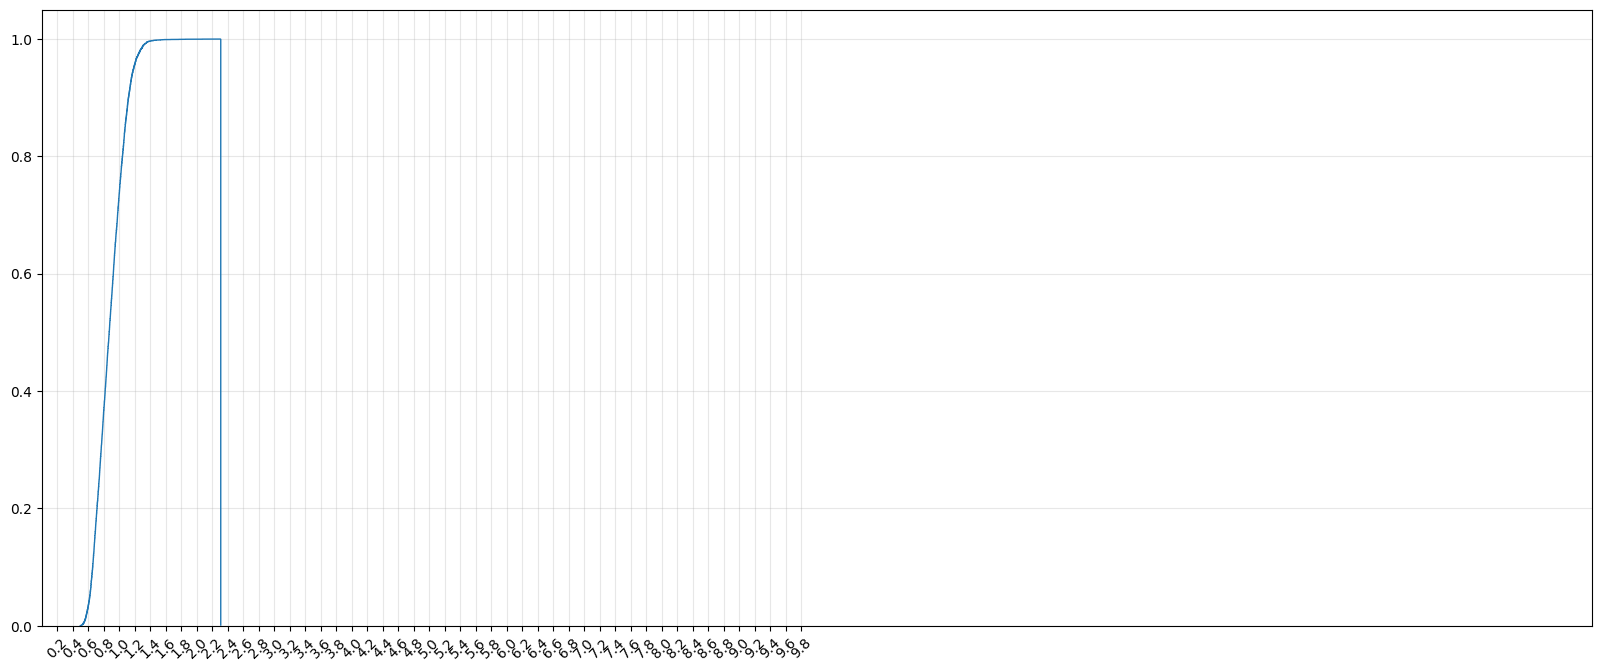

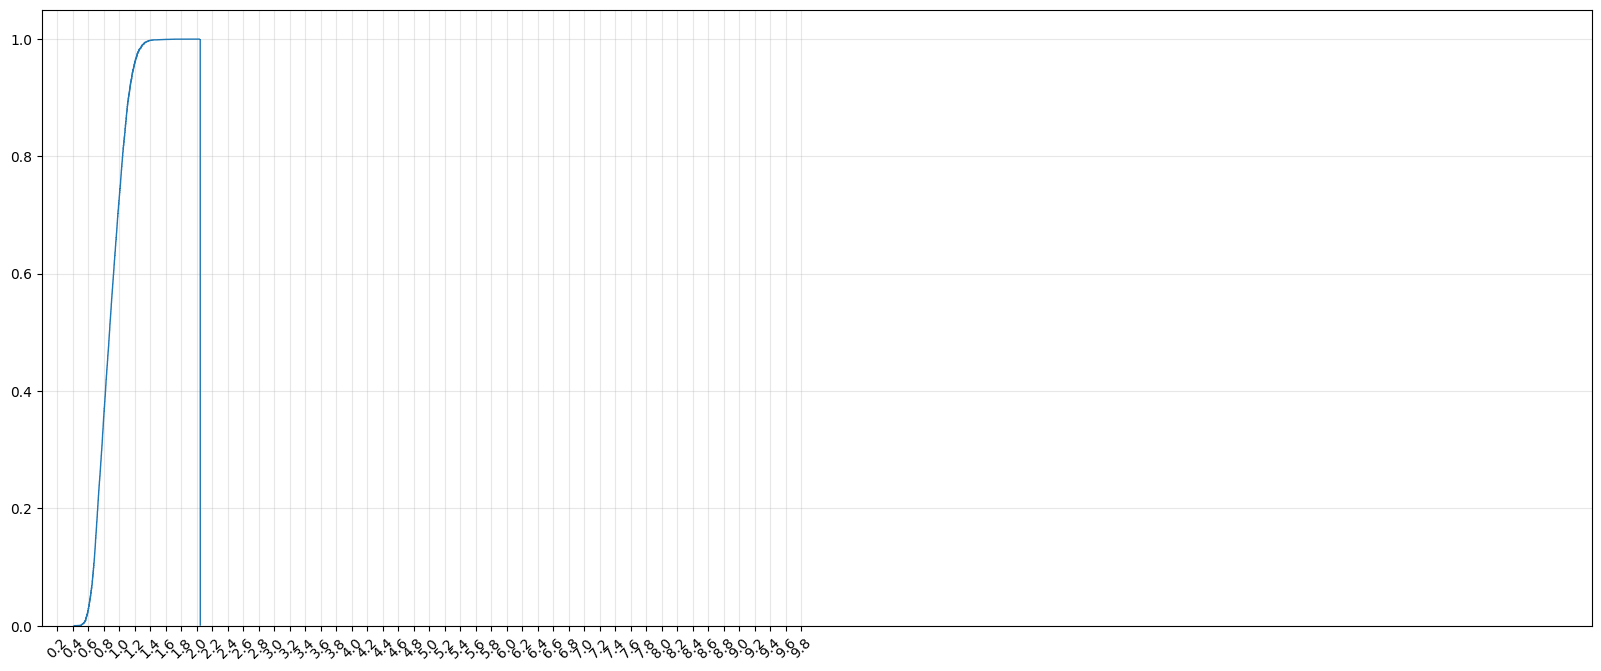

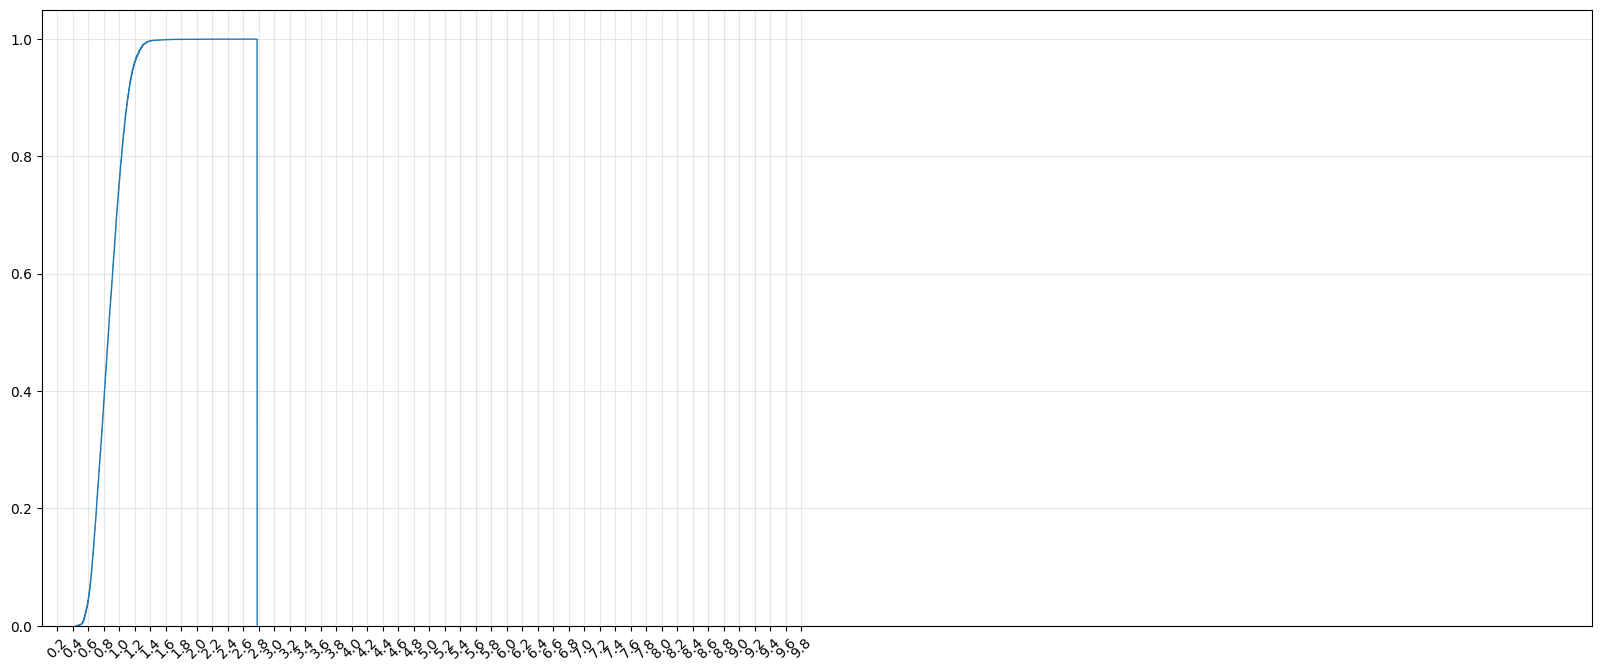

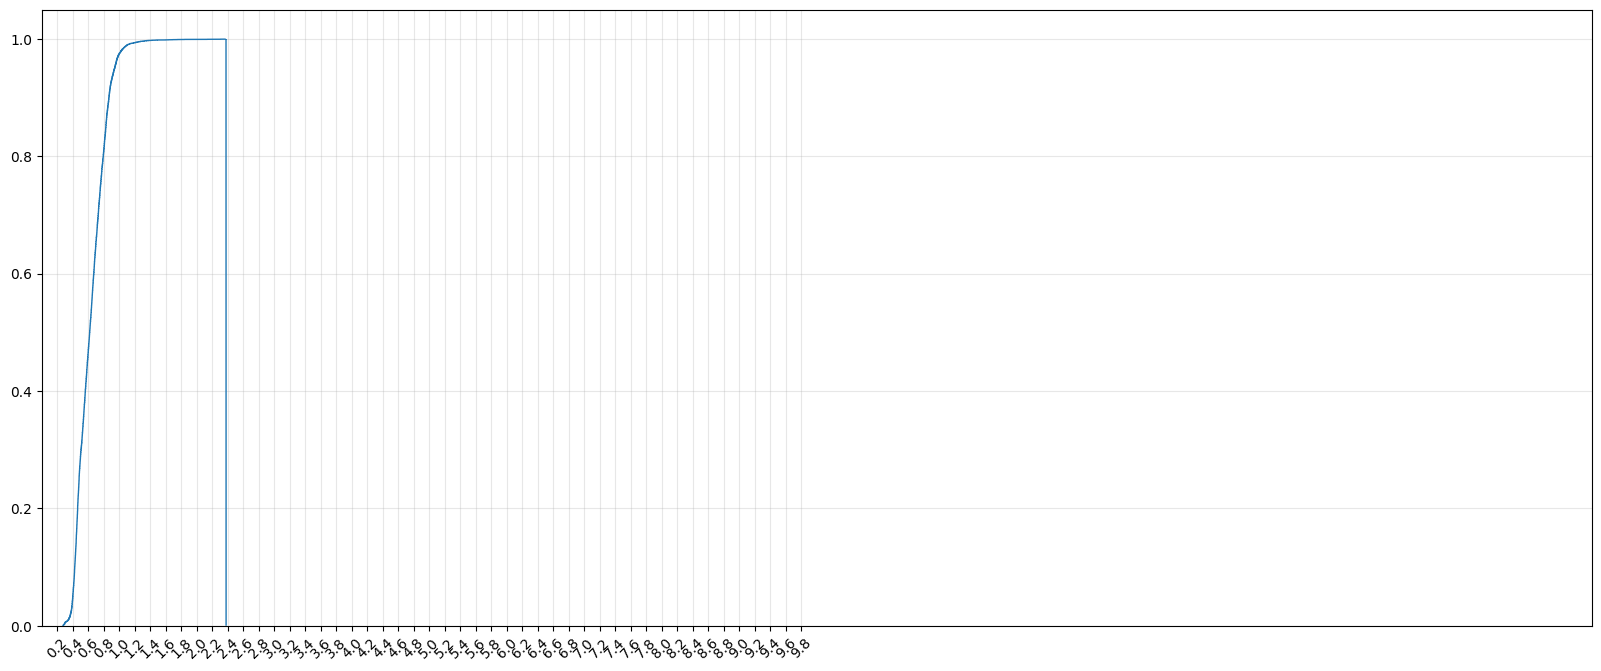

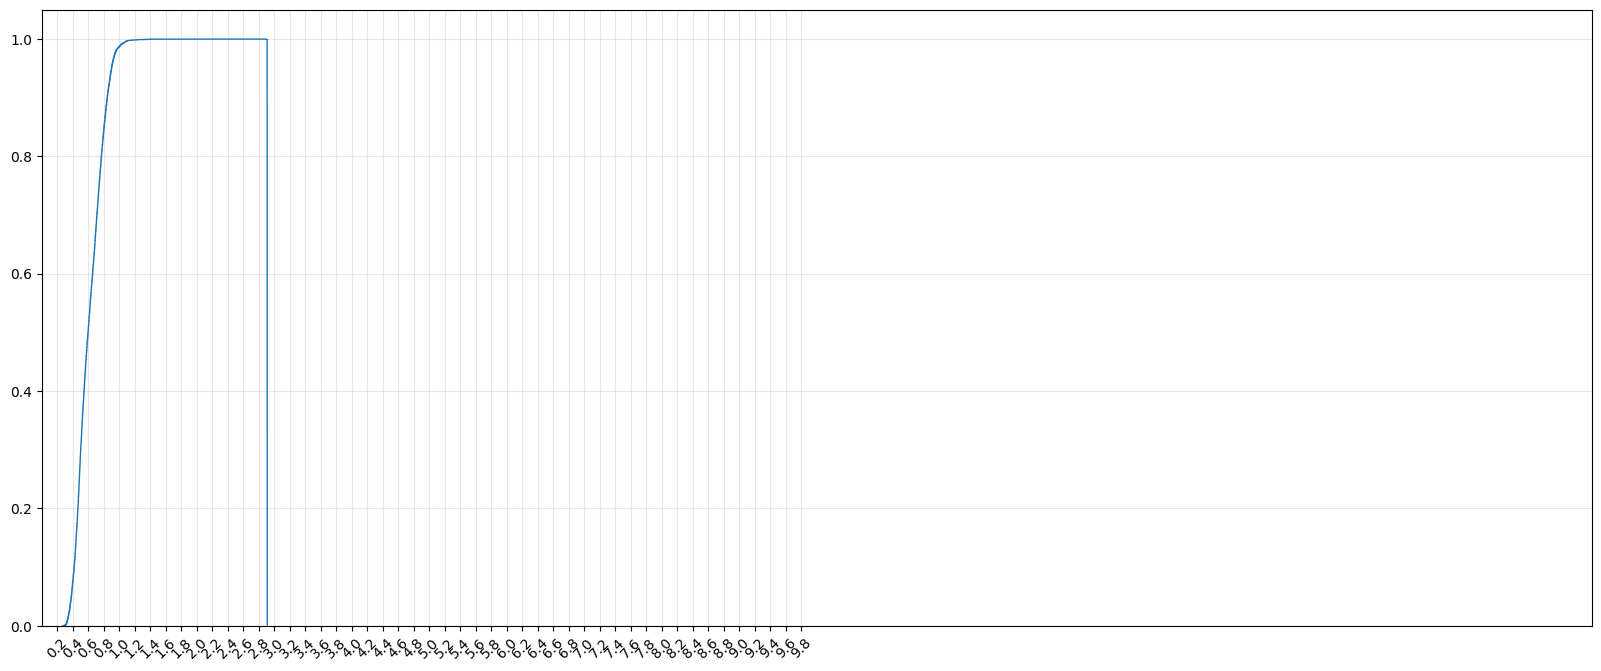

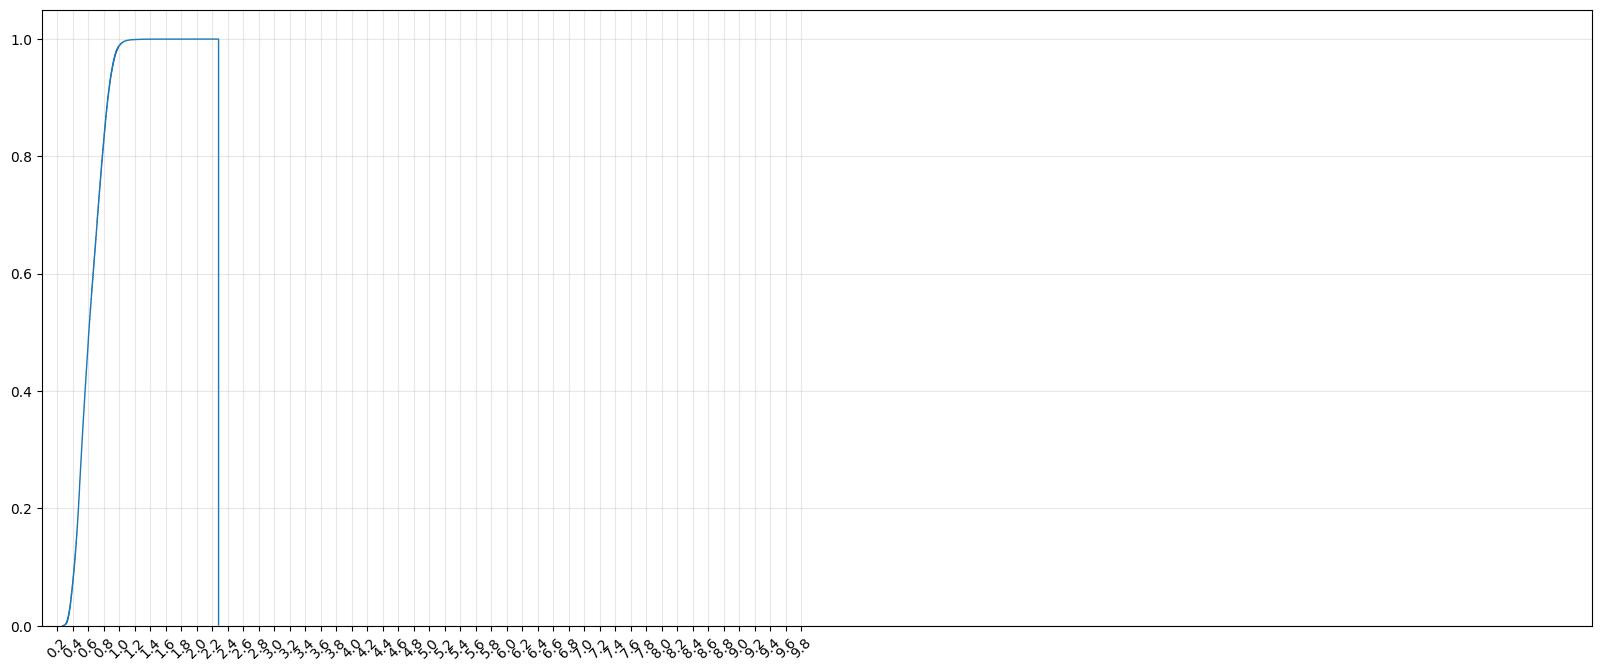

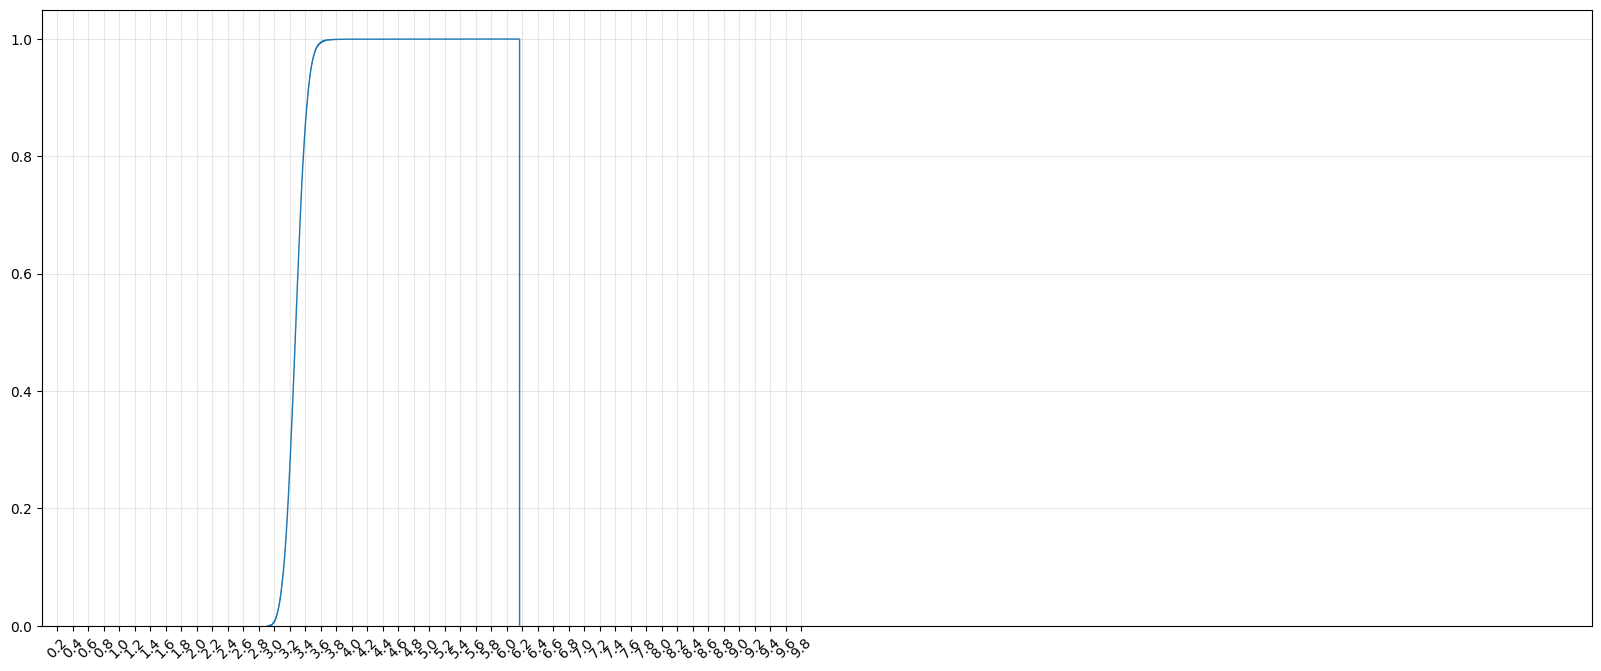

In [39]:
for i, key in enumerate(data_names):
    data = datas[key]
    name = data_names[key]
    color = colors[i]

    fig, ax = plt.subplots(figsize=(20, 8))

    n, _, patches = ax.hist(data, int(20 / 0.01), density=True, cumulative=True, histtype='step', label=key)

    # plt.hist(data, label=name, color=color, alpha=1, bins=bins, log=True, align='left')
    # plt.legend(loc='upper right')
    plt.xticks(bins, rotation=45)

    #t = format_time()
    # plt.savefig(f"plots/hist-{t}.svg")
    # plt.savefig(f"plots/hist-{t}.eps")
    plt.xlim(0, 20)
    plt.grid(alpha=0.3)

    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


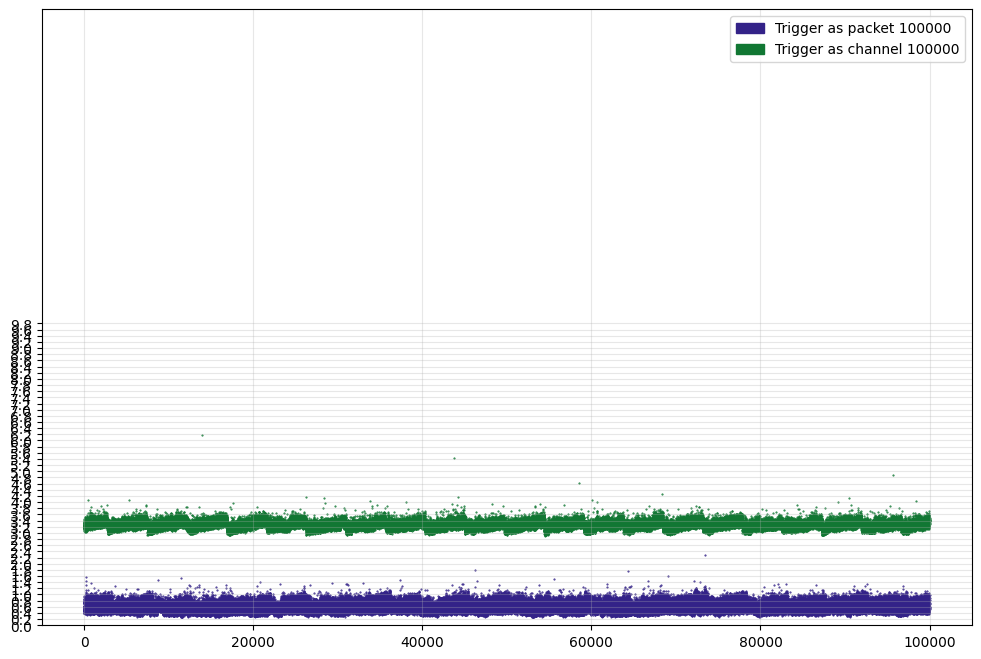

In [41]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

plt.yticks([0] + bins)
plt.grid(alpha=0.3)

patches = []

d = dict(datas)
d.pop('PREEMPT_RT')
d.pop('normal')
d.pop('RR sched all 98')
d.pop('RR sched 98-20')
d.pop('nologging')
d.pop('memory lock')

for i, key in enumerate(d):
    data = datas[key]
    plt.scatter(range(0, len(data)), data, label=key, color=colors[i], marker='.', s=1, alpha=1)
    patch = mpatches.Patch(color=colors[i], label=key)
    patches.append(patch)

plt.ylim(0, 20)
plt.legend(loc='upper right', handles=patches)

t = format_time()
plt.savefig(f"plots/scatter-{t}.svg")
plt.savefig(f"plots/scatter-{t}.eps")
plt.show()

In [25]:
stds = {
    'nologging': [],
    'memory lock': []
}
means = {
    'nologging': [],
    'memory lock': []
}

for j in range(0, 1000):
    bootstrapped = {
        'nologging': [],
        'memory lock': []
    }
    nolog = []
    for i in range(0, 10000):
        index = np.random.randint(0, 10000)
        nologging = datas['nologging'][index]
        bootstrapped['nologging'].append(nologging)

        index = np.random.randint(0, 9999)
        memorylock = datas['memory lock'][index]
        bootstrapped['memory lock'].append(memorylock)

    nologging_std = np.std(bootstrapped['nologging'])
    memorylock_std = np.std(bootstrapped['memory lock'])

    stds['nologging'].append(nologging_std)
    stds['memory lock'].append(memorylock_std)

    if j % 50 == 0:
        print(f'stds({j}): {stds["nologging"][-1]} {stds["memory lock"][-1]}')
        # print(f'means({j}): {means["nologging"][-1]} {means["memory lock"][-1]}')

stds(0): 0.17987479882229196 0.17322772068188164
stds(50): 0.1792480439702481 0.17471028874923195
stds(100): 0.17971436283655795 0.17300994151663657
stds(150): 0.180156439751234 0.17390638313411616
stds(200): 0.17999523337352577 0.17469123261698052
stds(250): 0.17931055906931415 0.1743426363539338
stds(300): 0.17832418854409515 0.17455923766329298
stds(350): 0.179822047021048 0.17652407755816202
stds(400): 0.17825597933643067 0.1739330911852026
stds(450): 0.17953851392946304 0.17607753512313828
stds(500): 0.18043546181477188 0.17562377558220868
stds(550): 0.17818111428947794 0.17615977178570028
stds(600): 0.18274442494270518 0.17682915500309898
stds(650): 0.17971614398197508 0.1729808901576992
stds(700): 0.1797514858897973 0.1747296079221836
stds(750): 0.1799056795443379 0.17490730194660256
stds(800): 0.1795102361591394 0.17429386078089498
stds(850): 0.17824298967620014 0.17522040035338352
stds(900): 0.18195175081806716 0.17600579727952145
stds(950): 0.1776721829577157 0.17356085733643

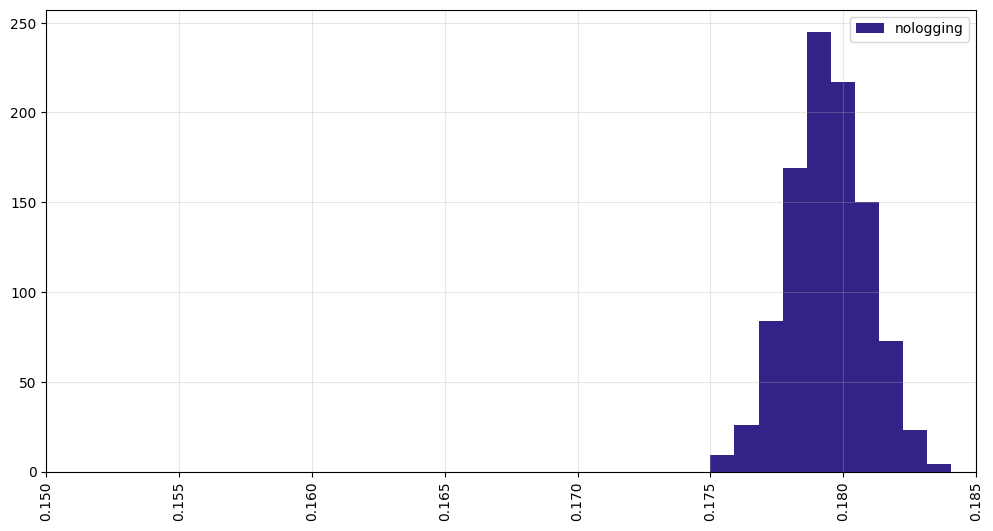

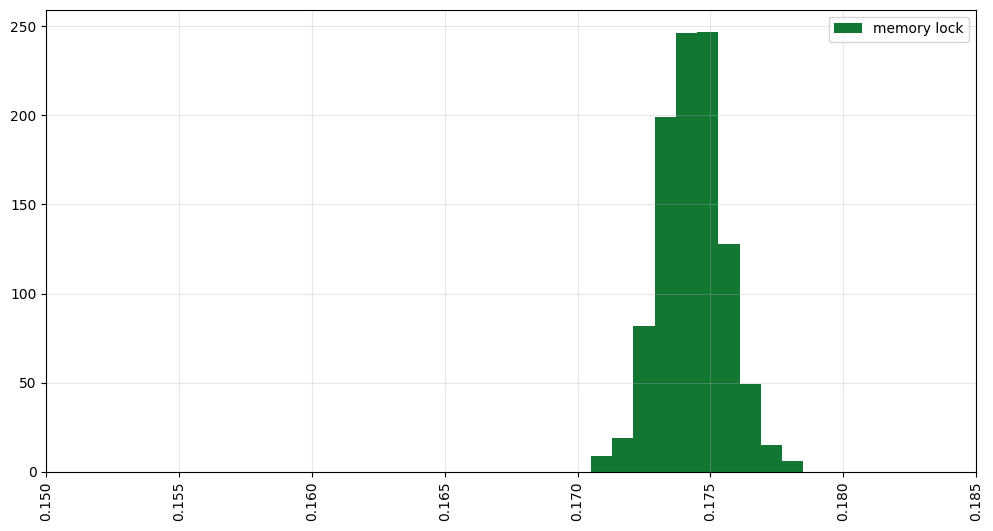

In [39]:
bin_width = 0.001
#bins = [x * bin_width / 10 for x in range(10, int(20 / bin_width))]
#print(bins)
for i, key in enumerate(stds):
    d = stds[key]
    color = colors[i]

    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(6)
    plt.grid(alpha=0.3)
    plt.hist(d, label=key, color=color, alpha=1, log=False, align='left')
    plt.legend(loc='upper right')
    plt.xticks(bins, rotation=90)

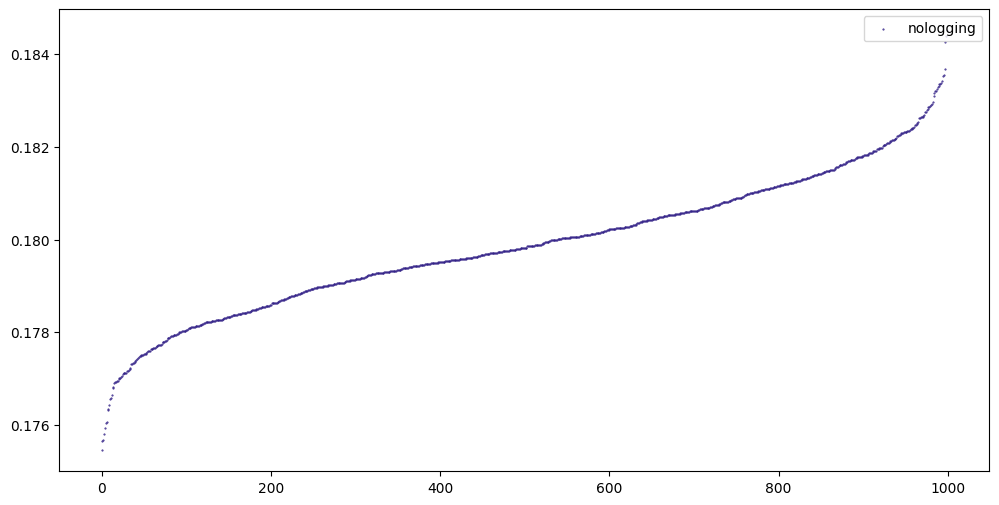

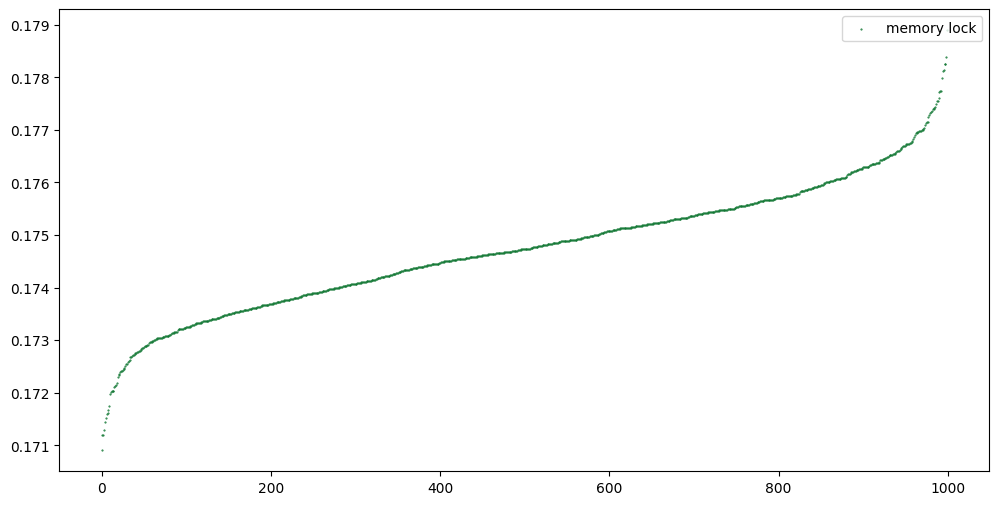

In [40]:
for i, key in enumerate(stds):
    d = sorted(stds[key])
    color = colors[i]

    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(6)

    # plt.scatter(d, label=key, color=color, alpha=1, bins=bins, log=False, align='left')
    plt.scatter(range(0, len(d)), d, label=key, color=colors[i], marker='.', s=1, alpha=1)
    plt.legend(loc='upper right')
    # plt.xticks(bins, rotation=90)

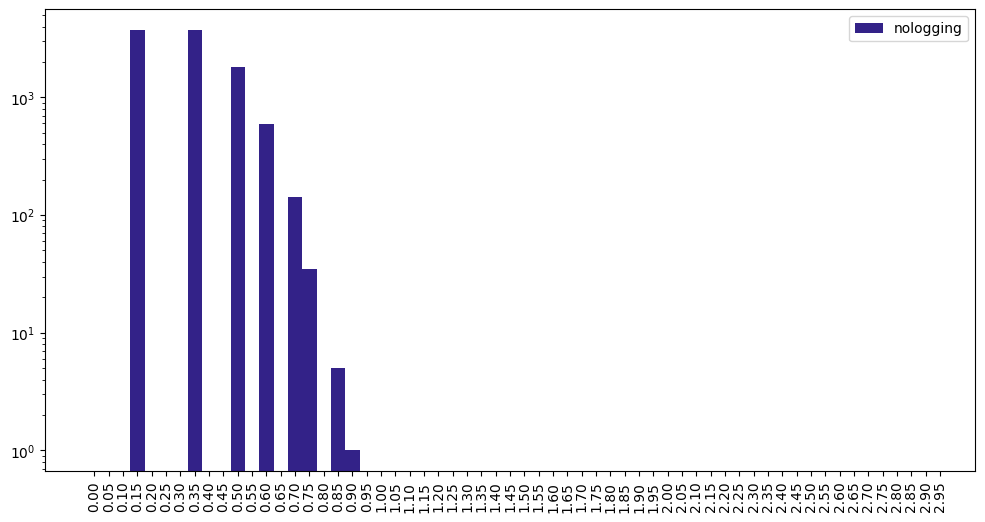

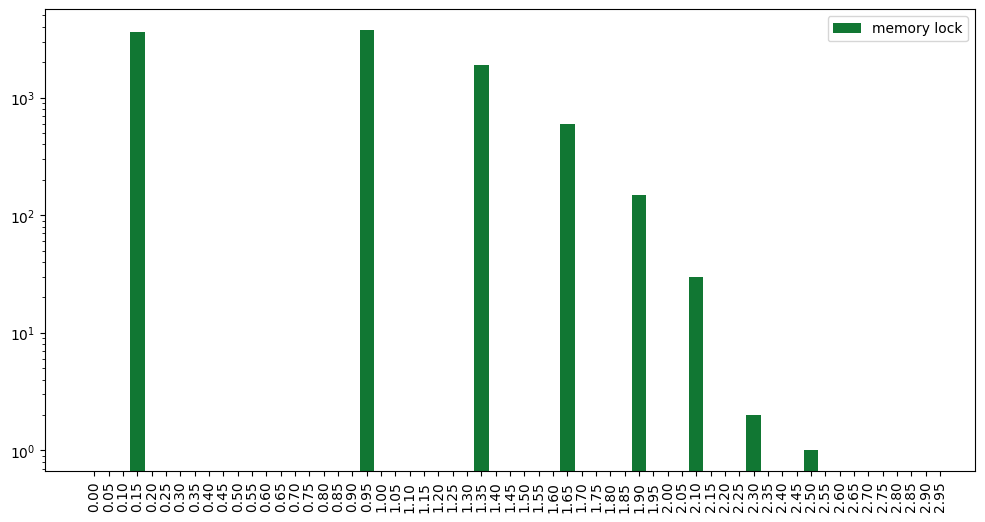

In [95]:
bin_width = 0.05
bins = [x * bin_width for x in range(0, int(3 / bin_width))]
for i, key in enumerate(means):
    d = stds[key]
    color = colors[i]

    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(6)

    plt.hist(d, label=key, color=color, alpha=1, bins=bins, log=True, align='left')
    plt.legend(loc='upper right')
    plt.xticks(bins, rotation=90)

In [46]:
indices = [
    'mean',
    'median',
    'std',
    'max',
    #'index of max',
    #'second max',
    #'index of second max',
    'min',
    #'index of min'
    ]
columns = ['Normal', 'PREEMPT_RT']

df = pd.DataFrame(index=indices, columns=list(datas.keys()))

for key, value in datas.items():
    largest_indices = np.argpartition(value, -2)[-2:]
    largest = value[largest_indices[1]]
    second_largest = value[largest_indices[0]]

    df[key]["mean"] = np.mean(value)
    df[key]["std"] = np.std(value)
    df[key]["median"] = np.median(value)
    df[key]["max"] = largest
    #df[key]["index of max"] = largest_indices[1]
    #df[key]["second max"] = second_largest
    #df[key]["index of second max"] = largest_indices[0]
    df[key]["min"] = np.min(value)
    #df[key]["index of min"] = np.argmin(value)

df

,normal,nologging,memory lock,RR sched all 98,RR sched 98-20,PREEMPT_RT,Trigger as packet 100000,Trigger as channel 100000
mean,1.159728,0.882539,0.886644,0.873422,0.636456,0.618925,0.626652,3.277236
median,0.97,0.871,0.875,0.862,0.619,0.599,0.608,3.276
std,3.864224,0.179908,0.174789,0.181117,0.182751,0.167042,0.16604,0.121266
max,343.081,2.31,2.046,2.78,2.379,2.91,2.282,6.166
min,0.583,0.492,0.411,0.438,0.27,0.265,0.264,2.913


In [56]:
print(df.to_latex(float_format="{:0.3f}".format))
print()
print(df.style.to_latex())

\begin{tabular}{lllllllll}
\toprule
{} &  normal & nologging & memory lock & RR sched all 98 & RR sched 98-20 & PREEMPT\_RT & Trigger as packet 100000 & Trigger as channel 100000 \\
\midrule
mean   &   1.160 &     0.883 &       0.887 &           0.873 &          0.636 &      0.619 &                    0.627 &                     3.277 \\
median &   0.970 &     0.871 &       0.875 &           0.862 &          0.619 &      0.599 &                    0.608 &                     3.276 \\
std    &   3.864 &     0.180 &       0.175 &           0.181 &          0.183 &      0.167 &                    0.166 &                     0.121 \\
max    & 343.081 &     2.310 &       2.046 &           2.780 &          2.379 &      2.910 &                    2.282 &                     6.166 \\
min    &   0.583 &     0.492 &       0.411 &           0.438 &          0.270 &      0.265 &                    0.264 &                     2.913 \\
\bottomrule
\end{tabular}


\begin{tabular}{lllllllll}
 & normal

/tmp/ipykernel_7779/4201227753.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(float_format="{:0.3f}".format))


In [43]:
datas["memory lock"][:10]

[0.411, 0.767, 0.962, 1.37, 0.97, 1.11, 0.7, 1.055, 1.207, 0.776]

In [29]:
len(datas["Trigger as packet 100000"])

100000